In [6]:
#import 

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
#identify CSV files 
city_data = pd.read_csv('raw_data/city_data.csv')
riders_data = pd.read_csv('raw_data/ride_data.csv')

In [8]:
#read data using info()
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [9]:
#read data using info()
riders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [25]:
#merge to dataframe 
combined = pd.merge(city_data, riders_data,on ="city",how='outer')
combined.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


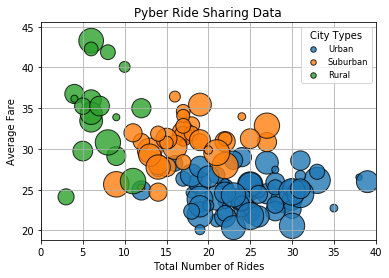

In [26]:
##create variables for city type, used for scatter plot
urbanCities=combined[combined["type"]=="Urban"]
suburbanCities=combined[combined["type"]=="Suburban"]
ruralCities=combined[combined["type"]=="Rural"]


##use previous variables for averages and totals
urbanRideCount=urbanCities.groupby(["city"]).count()["ride_id"]
urbanFareAvg=urbanCities.groupby(["city"]).mean()["fare"]
urbanDriverCount=urbanCities.groupby(["city"]).mean()["driver_count"]

suburbanRideCount=suburbanCities.groupby(["city"]).count()["ride_id"]
suburbanFareAvg=suburbanCities.groupby(["city"]).mean()["fare"]
suburbanDriverCount=suburbanCities.groupby(["city"]).mean()["driver_count"]

ruralRideCount=ruralCities.groupby(["city"]).count()["ride_id"]
ruralFareAvg=ruralCities.groupby(["city"]).mean()["fare"]
ruralDriverCount=ruralCities.groupby(["city"]).mean()["driver_count"]

plt.scatter(urbanRideCount, 
            urbanFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(suburbanRideCount, 
            suburbanFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

plt.scatter(ruralRideCount, 
            ruralFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare")
plt.xlabel("Total Number of Rides")
plt.xlim((0,40))
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


plt.show()

In [27]:
#create new dataframe with needed information for fare % by region
typeFare = combined.groupby('type')["fare"].sum().reset_index()
typeFare

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


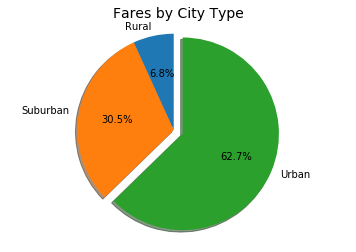

In [28]:
#create pie chart for fares by city type
fig1, ax1 = plt.subplots()
ax1.pie(typeFare["fare"], labels = typeFare["type"], shadow = True, explode = (0,0,0.1), 
        startangle=90, autopct = "%1.1f%%",)
ax1.axis('equal')
plt.title('Fares by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()

In [30]:
#create dataframe of sum of drivers by city type
typeDriver = combined.groupby('type')["driver_count"].sum().reset_index()
typeDriver

,type,driver_count
0,Rural,537
1,Suburban,8570
2,Urban,59602


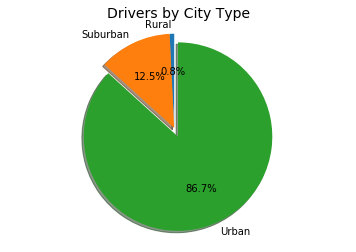

In [31]:
#plot drivers by region type 
fig1, ax1 = plt.subplots()
ax1.pie(typeDriver["driver_count"], labels = typeDriver["type"], shadow = True, explode = (0,0,0.1), 
        startangle=90, autopct = "%1.1f%%")
ax1.axis('equal')
plt.title('Drivers by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()

In [33]:
#create data frame for rides counting dates on record by city type
typeRides = combined.groupby('type')["date"].count().reset_index()
typeRides

,type,date
0,Rural,125
1,Suburban,625
2,Urban,1625


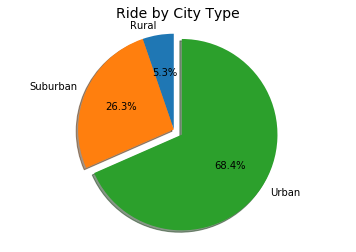

In [34]:
#plot chart of rides by city type
fig1, ax1 = plt.subplots()
ax1.pie(typeRides["date"], labels = typeRides["type"], shadow = True, explode = (0,0,0.1), 
        startangle=90, autopct = "%1.1f%%")
ax1.axis('equal')
plt.title('Ride by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()